In [25]:
# Usual Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')
import os

In [26]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [27]:
# data = pd.read_csv(f'./class_xls/data2.csv')
# data = data.iloc[0:, 1:] 
# data.head()

In [28]:
current_path = os.getcwd()
current_path = os.getcwd()
genre_music_path = os.path.join(current_path, 'genres_original')
class_xls_path = os.path.join(current_path, 'class_xls')
print(list(os.listdir(genre_music_path)))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [29]:
# Importing 1 file
audio_file = os.path.join(genre_music_path,'reggae','reggae.00036.wav')
y, sr = librosa.load(audio_file)

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# Verify length of the audio
print('Check Len of Audio:', 661794/22050)

y: [0.02072144 0.04492188 0.05422974 ... 0.06912231 0.08303833 0.08572388] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [30]:
from codeFeature.feature_extractor import *

In [31]:
def GetGenre(genre_music_path):
    label_names = [item for item in os.listdir(
        genre_music_path) if os.path.isdir(os.path.join(genre_music_path, item))]
    nb_train_samples = sum([len(files) for _, _, files in os.walk(genre_music_path)])
    
    return label_names, nb_train_samples
genres, nb_train_samples = GetGenre(genre_music_path)

In [32]:
# dataExport_path = os.path.join(class_xls_path,'data2.csv')

In [33]:
# extract_Feature_audio_toCSV(genre_music_path, dataExport_path, genres)

In [34]:
data = pd.read_csv(f'./class_xls/data2.csv')
data = data.iloc[0:, 1:] 
data.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,0.331918,0.090973,0.133103,0.003472,1709.695245,57163.961542,1933.811072,80517.262556,3576.578906,6.237365e+05,...,40.736065,-3.214174,37.470497,0.411830,37.329441,-5.189313,34.034435,-0.428244,44.372490,blues
1,0.341341,0.085158,0.113380,0.001503,1862.152169,190270.100391,2044.363474,102500.152725,3963.745898,1.099210e+06,...,67.677002,-6.563415,40.349876,0.740047,53.174896,-2.516605,96.645866,6.000895,61.931782,blues
2,0.347273,0.090748,0.124936,0.004253,1819.031220,109954.693790,2085.854586,71784.102943,4025.158594,7.583332e+05,...,68.337082,-1.700381,32.514679,2.621530,43.788219,-2.606426,56.476410,2.352135,34.945358,blues
3,0.367662,0.088128,0.128023,0.002582,1690.639848,109272.678104,2000.887093,82949.723609,3705.347461,8.994276e+05,...,46.770283,-3.136297,27.493921,-0.069073,30.165653,-2.403810,53.037487,3.597623,30.709112,blues
4,0.333540,0.090811,0.147225,0.001878,1647.168975,74200.846542,1988.534249,40893.213344,3530.497852,5.554502e+05,...,37.696289,-0.993938,35.296734,1.825108,56.034340,-3.346776,26.230961,0.519681,32.662136,blues


In [35]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label']

In [36]:
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    #print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [39]:
# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

[16:20:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Cross Gradient Booster : 0.90707 



[16:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy : 0.64411 



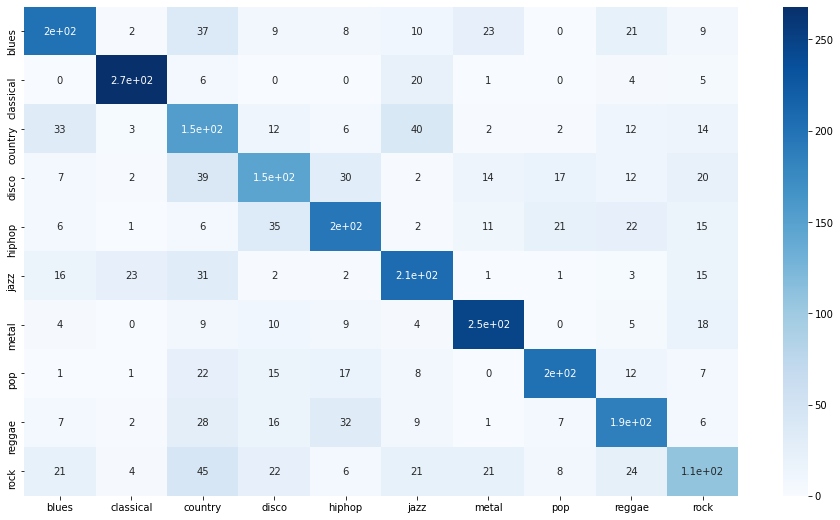

In [40]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=1e-5)
xgb.fit(X_train, y_train)


preds = xgb.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
# plt.savefig("conf matrix")

In [1]:
# feature_extractor = extract_Feature_audio(songname=os.path.join(genre_music_path,'rock', 'rock.00003.wav'), genre='_')
# feature_extractor

In [2]:
# from __future__ import unicode_literals
# import youtube_dl

# ydl_opts = {}
# with youtube_dl.YoutubeDL(ydl_opts) as ydl:
#     ydl.download(['https://www.youtube.com/watch?v=BaW_jenozKc'])

In [3]:
# import youtube_dl

# ydl = youtube_dl.YoutubeDL({'outtmpl': '%(id)s.%(ext)s'})

# with ydl:
#     result = ydl.extract_info(
#         'https://www.youtube.com/watch?v=d6rxGmvQPLU',
#         download=False # We just want to extract the info
#     )

# if 'entries' in result:
#     # Can be a playlist or a list of videos
#     video = result['entries'][0]
# else:
#     # Just a video
#     video = result

# # print(video)
# video_url = [video.keys()]

# print(result['uploader_url'])
# print(video_url)

In [41]:
# import pickle
# file_name = "xgb_reg.pkl"
file_name = "xgb_reg.json"

# save
# pickle.dump(xgb, open(os.path.join( 'save_model', file_name), "wb"))
xgb.save_model(os.path.join( 'save_model', file_name))


In [46]:
# load
xgb_load = XGBClassifier()
xgb_load.load_model(os.path.join( 'save_model', file_name))
# # test
# xgb_load
# xgb_load.predict()

In [57]:
songname_pre = os.path.join(genre_music_path,'blues', 'blues.00073.wav')
data_predict = extract_Feature_audio(songname_pre, genre='_')
# print(data_predict)

pred = xgb.predict(np.array(data_predict))
pred.max()

'disco'